In [1]:
import numpy as np
import matplotlib as plt
from astropy.io import fits
import pickle
from astropy import coordinates as coord, units as u

In [2]:
median_bias = pickle.load(open("./median_bias.p", "rb"))
median_bias_error =  pickle.load(open("./median_bias_error.p", "rb"))
median_normalized_flat =  pickle.load(open("./median_normalized_flat.p", "rb"))
median_normalized_flat_errors =  pickle.load(open("./median_normalized_flat_errors.p", "rb"))

In [3]:
science_list = np.genfromtxt('science/science.list', dtype=str)

In [4]:
len(science_list)

2376

In [5]:
science_test_list = science_list[1100:1110]

In [6]:
for science_name in science_test_list:
    science_fits = fits.open('science/' + science_name)
    
    readout_noise = science_fits[0].header['RDNOISE']
    
    gain = science_fits[0].header['GAIN']
    
    science_data = science_fits[0].data * gain # save the data from the first HDU 
    science_fits.close()

    science_debiased = science_data - median_bias
    science_corrected = science_debiased / median_normalized_flat

    ## Error associated to the science corrected frame
    science_debiased_errors = np.sqrt(readout_noise**2 + median_bias_error**2 + science_debiased)
    science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (median_normalized_flat_errors/median_normalized_flat)**2)

/var/folders/94/z81thb_50q59qb73cmq_92s00000gn/T/ipykernel_33950/1677539326.py:12: RuntimeWarning: divide by zero encountered in divide
  science_corrected = science_debiased / median_normalized_flat
/var/folders/94/z81thb_50q59qb73cmq_92s00000gn/T/ipykernel_33950/1677539326.py:12: RuntimeWarning: invalid value encountered in divide
  science_corrected = science_debiased / median_normalized_flat
/var/folders/94/z81thb_50q59qb73cmq_92s00000gn/T/ipykernel_33950/1677539326.py:16: RuntimeWarning: divide by zero encountered in divide
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (median_normalized_flat_errors/median_normalized_flat)**2)
/var/folders/94/z81thb_50q59qb73cmq_92s00000gn/T/ipykernel_33950/1677539326.py:16: RuntimeWarning: invalid value encountered in multiply
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (median_normalized_flat_errors/median_normalized_flat)**2)


In [7]:
print(science_name)
print(science_name[:-5])
new_name = science_name[:-5] + '_corr.p'
print(new_name)

AF579329.fits
AF579329
AF579329_corr.p


In [8]:
for science_name in science_test_list:
    science_fits = fits.open('./science/' + science_name)

    readout_noise = science_fits[0].header['RDNOISE'] # [e] photoelectrons
    gain = science_fits[0].header['GAIN']  # [e/ADU]

    science_data = science_fits[0].data * gain # save the data from the first HDU 
    science_fits.close()
    
    science_debiased = science_data - median_bias
    science_corrected = science_debiased / median_normalized_flat

    ## Error associated to the science corrected frame
    science_debiased_errors = np.sqrt(readout_noise**2 + median_bias_error**2 + science_debiased)
    science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (median_normalized_flat_errors/median_normalized_flat)**2)

    new_name = './correct/' + science_name[:-5] + '_corr.p'
    pickle.dump(science_corrected, open(new_name, 'wb'))
    new_name = './correct/' + science_name[:-5] + '_corr_errors.p'
    pickle.dump(science_corrected_errors, open(new_name, 'wb'))

/var/folders/94/z81thb_50q59qb73cmq_92s00000gn/T/ipykernel_33950/870466442.py:11: RuntimeWarning: divide by zero encountered in divide
  science_corrected = science_debiased / median_normalized_flat
/var/folders/94/z81thb_50q59qb73cmq_92s00000gn/T/ipykernel_33950/870466442.py:11: RuntimeWarning: invalid value encountered in divide
  science_corrected = science_debiased / median_normalized_flat
/var/folders/94/z81thb_50q59qb73cmq_92s00000gn/T/ipykernel_33950/870466442.py:15: RuntimeWarning: divide by zero encountered in divide
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (median_normalized_flat_errors/median_normalized_flat)**2)
/var/folders/94/z81thb_50q59qb73cmq_92s00000gn/T/ipykernel_33950/870466442.py:15: RuntimeWarning: invalid value encountered in multiply
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (median_normalized_flat_errors/median_normalized_flat)**2)


In [11]:
science_fits = fits.open('./science/' + science_test_list[0])
science_fits[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  521 / length of data axis 1                          
NAXIS2  =                  222 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2019-12-29T20:41:27' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
FILENAME= 'AF579320.fits'      / Original file name                             
TIMESYS = 'UTC     '        

### Extracting and saving useful information

In [12]:
from astropy.time import Time

In [13]:
t = Time(science_fits[0].header['JD'], format = 'jd', scale='utc')

In [14]:
print('ISO Representation: {0:s}'.format(t.iso))

ISO Representation: 2019-12-29 20:41:20.774


In [16]:
n_images = len(science_test_list)

array_jd = np.zeros(n_images)
array_exptime = np.zeros(n_images)
array_airmass = np.zeros(n_images)

for i_science, science_name in enumerate(science_test_list):

    science_fits = fits.open('./science/'+science_name)    
    array_jd[i_science] = science_fits[0].header['JD']
    array_exptime[i_science] = science_fits[0].header['EXPTIME']
    array_airmass[i_science] = science_fits[0].header['AIRMASS']

    ## Let's print the comment for the first image
    if i_science==0:
        print('{0:12.4f} :  {1:s}'.format(array_jd[i_science], science_fits[0].header.comments['JD']))
        print('{0:12.1f} :  {1:s}'.format(array_exptime[i_science], science_fits[0].header.comments['EXPTIME']))
        print('{0:12.2f} :  {1:s}'.format(array_airmass[i_science], science_fits[0].header.comments['AIRMASS']))
    
    science_fits.close()

2458847.3620 :  JD at start
         5.0 :  [s] Exposure time
        1.20 :  Telescope airmass at start


In [17]:
array_jd

array([2458847.362046, 2458847.362127, 2458847.362207, 2458847.362289,
       2458847.362369, 2458847.362451, 2458847.362533, 2458847.362614,
       2458847.362694, 2458847.362775])

## Converting JD_UTC to BJD_TDB

Not sure what is going on here

In [20]:
target = coord.SkyCoord("06:30:32.797", "+29:40:20.26", 
                        unit=(u.hourangle, u.deg), frame='icrs')

In [26]:
##light curve time variation over one year

jd_plot = np.arange(2460000.0,2460365.25, 0.10)
tm_plot = Time(jd_plot, format='jd', scale='utc', location=('45.8472d','11.569d'))

In [22]:
ltt_plot = tm_plot.light_travel_time(target, ephemeris='jpl')

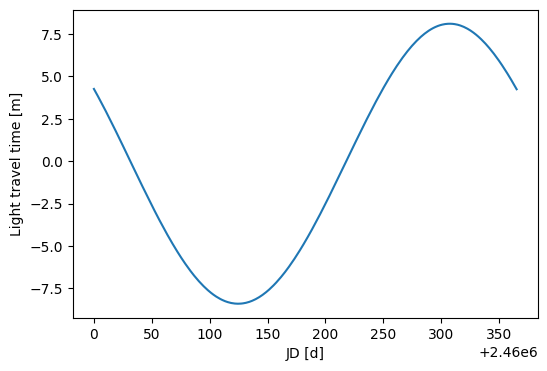

In [27]:
jd_plot = np.arange(2460000, 2460365.25, 0.10)
tm_plot = Time(jd_plot, format='jd', scale='utc', location=('45.8472d', '11.569d')) 
ltt_plot = tm_plot.light_travel_time(target, ephemeris='jpl')  

plt.figure(figsize=(6,4))
plt.plot(jd_plot, ltt_plot.to_value(u.min))
plt.xlabel('JD [d]')
plt.ylabel('Light travel time [m]')
plt.show()

In [33]:
tm_plot.tdb

<Time object: scale='tdb' format='jd' value=[2460000.00080076 2460000.10080076 2460000.20080076 ... 2460365.0008011
 2460365.1008011  2460365.2008011 ]>

In [29]:
bjd_tdb = ltt_plot + tm_plot.tdb

In [35]:
jd = array_jd + array_exptime/86400./2. 

tm = Time(jd, format='jd', scale='utc', location=('45.8472d', '11.569d')) 

ltt_bary = tm.light_travel_time(target)  

bjd_tdb = tm.tdb + ltt_bary

print('Average Light travel time:                     {0:12.2f} minutes'.format(np.average(ltt_bary.to_value(u.min))))
print('Average difference between JD_UTC and BJD_TDB: {0:12.2f} seconds'.format(np.average(jd - bjd_tdb.to_value('jd'))*86400))

Average Light travel time:                             8.19 minutes
Average difference between JD_UTC and BJD_TDB:      -560.66 seconds
